In [1]:
import inference_pipline as ip
import torch
import rasterio
from rasterio.plot import show
import numpy as np
import os
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

c:\Users\Alexander\anaconda3\envs\worldstrat\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


In [2]:
src = "./site_images/"
site = 0
files = [f"{src}site{site}_img{i}.tif"for i in range(8)]
model_path = "pretrained_model/model.ckpt"
# Start x, start y, end x, end y
partial = [0,0,208,208]
overlap = 13
chip_size = 26

In [3]:
infer = ip.do_inference_from_path(files,
                                  model_path,
                                  partial=partial,
                                  overlap=overlap,
                                  chip_size=chip_size,
                                  exclude8=True)

Getting partial Tiff


c:\Users\Alexander\anaconda3\envs\worldstrat\lib\site-packages\lightning_fabric\utilities\cloud_io.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, 

Excluding 8b
Original shape: torch.Size([8, 12, 208, 208])
Chip Shape: torch.Size([8, 12, 26, 26])
Chip Count: 225


c:\Users\Alexander\anaconda3\envs\worldstrat\lib\site-packages\pytorch_lightning\utilities\parsing.py:262: UserWarning: Attribute 'backbone' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['backbone'])`.
  rank_zero_warn(


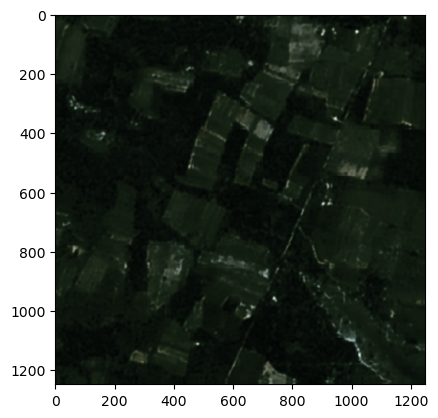

<AxesSubplot:>

In [4]:
show(infer.detach().numpy(),adjust=True)

In [ ]:
base_metadata_path = "mixedUrban_polygon_1(1).tif"
export_name = "inference_42.tif"

with rasterio.open(base_metadata_path) as r:
    test = r.profile
test["height"] = infer.shape[1]
test["width"] = infer.shape[2]
transform = rasterio.Affine(test["transform"][0] * (chip_size/156),
                test["transform"][1],
                test["transform"][2],
                test["transform"][3],
                test["transform"][4] * (chip_size/156),
                test["transform"][5])
test["transform"] = transform

with rasterio.open(export_name, 'w', **test) as w:
    w.write(infer.round().to(torch.int32).detach().numpy())